## Tittle: Netflix Dataset Cleaning & Analysis Project

## 1 Introduction
The dataset contains information about movies and tv shows watched on netflix till 2021. It dataset consist of information about the streaming platform's content, user interactions, and other relevant metrics. 

#### 1.1 Task Description
Effective data cleaning is crucial for ensuring the accuracy and reliability of subsequent analyses. Cleaning the Netflix dataset will enable us to derive meaningful insights and enhance the overall data quality for downstream applications. The data analysis process involves answering some predefined questions. 

#### 1.2 Library Importation and Data Reading

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(
    { "figure.figsize": (10, 6) },
    color_codes=True, font_scale=1.0)

In [2]:
netflix = pd.read_csv("https://raw.githubusercontent.com/KFiphy/Netflix-Data-Cleaning/main/file.csv")

#### 1.3 Basic Information of the dataset

In [3]:
netflix.head()           #prints first five rows of the data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.tail()         #prints last 5 rows

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
netflix.shape       #prints number of rows and columns  

(7789, 11)

In [6]:
netflix.size        #prints total number of elements

85679

In [7]:
netflix.columns     #prints all the columns name

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [8]:
netflix.dtypes      #prints data types of each columns

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [9]:
netflix.info()       #prints the characteristics of the data at once such as column names,nulls, data types, number of entries, e.t.c.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


## 2 Data Cleaning

#### 2.1 Duplicates
Duplicates are instances in a dataset where one or more records have identical values across all or a subset of their attributes.

In [10]:
#check for duplicates
netflix.duplicated().sum()

2

In [11]:
#remove the 2 duplicates permanently
netflix.drop_duplicates(inplace = True)

#check to see there are no more duplicates-oo
netflix[netflix.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


#### 2.2 Nulls
Null refers to the absence of a value or the representation of missing or undefined data.

In [12]:
#check for null values in each column
netflix.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

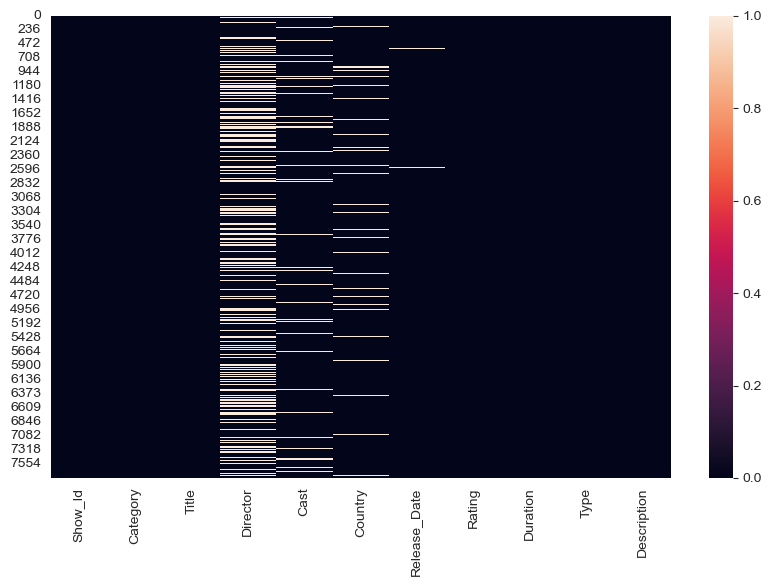

In [13]:
#show null values with heatmap
sns.heatmap(netflix.isnull())

Director Column has the highest number of nulls while Rating had the lowest.

#### 2.2.1 Filling null values in Release Date

In [14]:
# fill the date nulls with the most frequently occurring date
netflix["Release_Date"] = netflix["Release_Date"].fillna(netflix["Release_Date"].mode().iloc[0])

#### 2.2.2 Filling null values in Ratings

In [15]:
netflix["Rating"] = netflix["Rating"].fillna(netflix["Rating"].mode().iloc[0])

#### 2.2.3 Filling null values in Cast
it is important to note that dropping the nulls here will drop the entire row, including the good data that is stored on other variables within that row. Therefore, i will fill up with "Unknown" .

In [16]:
netflix["Cast"] = netflix["Cast"].fillna("unknown")

In [17]:
#confirm all nulls
netflix.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast               0
Country          507
Release_Date       0
Rating             0
Duration           0
Type               0
Description        0
dtype: int64

I have opted not to fill null values for Directors and Country in the dataset. With over 2000+ and 500+ nulls, respectively, filling these missing values with the mode could potentially skew the representation of the best-performing directors or countries for movie releases. By leaving the null values untouched, I aim to maintain the authenticity of the dataset, ensuring that any analysis reflects the true distribution of available information. This decision is grounded in the understanding that imputing nulls might introduce biases, particularly when dealing with a significant proportion of missing values, and could lead to a distorted representation of key factors in the dataset.

## 3 Columns/ Features Cleaning
#### 3.1 Cleaning Release Date

In [18]:
#check to see the datatype of release date
netflix["Release_Date"].dtypes

dtype('O')

In [19]:
#convert date from string to date format
#netflix["Date"] = pd.to_datetime(netflix["Release_Date"], errors="coerce")

netflix["Release_Date"] = netflix["Release_Date"].str.strip()
netflix["Date"] = pd.to_datetime(netflix["Release_Date"], format="%B %d, %Y")

#confirm data type
netflix.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date            datetime64[ns]
dtype: object

In [20]:
# Extract Year and Month
netflix["month"] = netflix["Date"].dt.month
netflix["year"] = netflix["Date"].dt.year

#### 3.2 Cleaning Duration
Since duration of the movies are supposed to be numbers , it will be converted from objects.

In [21]:
#Split duration into minutes and unit of minutes
netflix[["minutes","unit"]] =netflix["Duration"].str.split(" ", expand = True)

#convert minutes to integer
netflix["minutes"] = netflix["minutes"].astype(int)

## 4 Exploratory Data Analysis

#### Task 4.1
For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [22]:
netflix.loc[netflix["Title"] == "House of Cards" ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,2018-11-02,11,2018,6,Seasons


Show Id is "s2833" and Director is Robin Wright, David Fincher, Gerald McRaney, J., e.t.c.

#### Task 4.2
In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

Text(0.5, 1.0, 'Number of TV Shows & Movies released in different years')

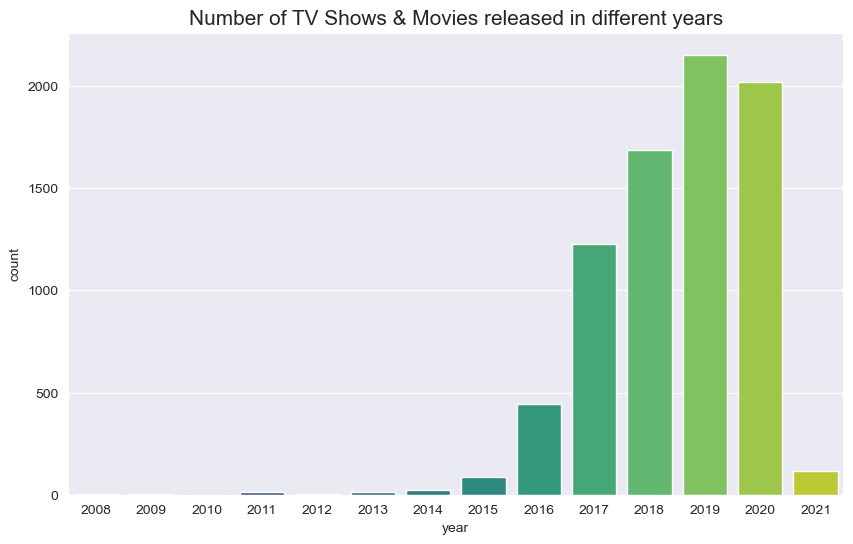

In [23]:
sns.countplot(data = netflix, x = netflix["year"], palette = "viridis")
plt.title("Number of TV Shows & Movies released in different years", fontsize = 15)

#### Task 4.3
How many Movies & TV Shows are in the dataset ? Show their percentage with Pie Chart.

In [24]:
netflix["Category"].value_counts()

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of TV Shows & Movies released')

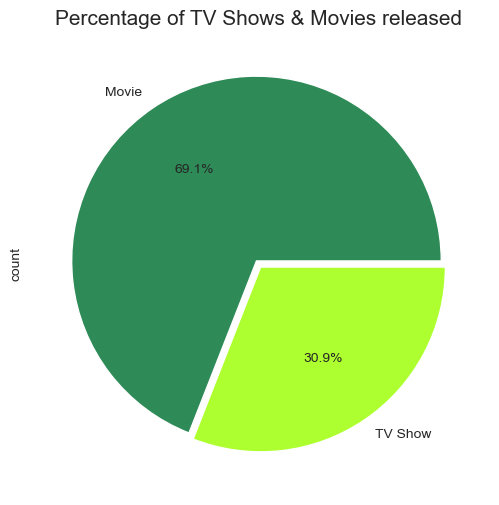

In [25]:
colorset = "seagreen", "greenyellow"

netflix["Category"].value_counts().plot.pie(
        colors = colorset, 
       radius = 1.0 , autopct = "%1.1f%%", explode=[0.02, 0.02])
plt.title("Percentage of TV Shows & Movies released", fontsize = 15)

#### Task 4.4
Show all the Movies that were released in year 2000.

In [26]:
netflix.loc[(netflix["Category"] == "Movie") & (netflix["year"] == 2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit


There were no movies released in 2000.

#### Task 4.5
Show only the Titles of all TV Shows that were released in India only

In [27]:
netflix.loc[(netflix["Category"] == "TV Show") & (netflix["Country"] == "India"), ["Title"]]

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


Seventy-one TV Shows were released in India.

#### Task 4.6
Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [28]:
netflix["Director"].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

#### Task 4.7
Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [29]:
netflix.loc[
    (netflix["Category"] == "Movie") & (netflix["Type"] == "Comedies") | (netflix["Country"] == "United Kingdom") ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,5,2018,87,min
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,9,2017,99,min
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,11,2019,1,Season
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,1,2021,102,min
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,12,2018,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,8,2017,1,Season
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2,2019,1,Season
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,unknown,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,3,2020,91,min
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,12,2017,87,min


There are 485 Movies that were were of Comedy type and either released in the Uk.

#### Task 4.8
In how many movies/shows, Tom Cruise was cast ?

In [30]:
netflix[netflix["Cast"].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,1,2020,189,min
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,7,2019,134,min


There were two movies where Tom Cruise was a cast.

#### Task 4.9
What are the different Ratings defined by Netflix ?

In [31]:
netflix["Rating"].nunique()

14

In [32]:
netflix["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

#### Task 4.9.1
How many Movies got the 'TV-14' rating, in Canada ?

In [33]:
netflix.loc[
    (netflix["Category"] == "Movie") & (netflix["Rating"] == "TV-14") & (netflix["Country"] == "Canada") ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
30,s31,Movie,#cats_the_mewvie,Michael Margolis,unknown,Canada,"February 5, 2020",TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2,2020,90,min
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,4,2019,105,min
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,12,2018,91,min
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,7,2018,88,min
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,11,2017,96,min
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,10,2019,62,min
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22,8,2017,94,min
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,"December 1, 2017",TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017-12-01,12,2017,140,min
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,unknown,Canada,"July 1, 2019",TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019-07-01,7,2019,78,min
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,"June 18, 2019",TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019-06-18,6,2019,89,min


In [34]:
netflix.loc[
    (netflix["Category"] == "Movie") & (netflix["Rating"] == "TV-14") & (netflix["Country"] == "Canada") ].shape

(11, 16)

There are 11 movies with TV-14 rating, in Canada 

#### Task 4.9.2
How many TV Shows got the 'R' rating, after year 2018 ?

In [35]:
netflix.query("Category == 'TV Show' & Rating == 'R' & year > 2018")

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,4,2019,1,Season


One TV Show got the R rating after 2018

#### Task 4.10
What is the maximum duration of a Movie/Show on Netflix ?

In [36]:
movie = netflix.query("Category == 'Movie' ")
movie["minutes"].max()

312

In [37]:
tv_show = netflix.query("Category == 'TV Show' ")
tv_show["minutes"].max()

16

Note that some have their units as seasons and some has as minutes. Among Movies, the maximum duration is 312 minutes. Among TV Shows, maximum duration is 16 seasons

#### Task 4.11
Which individual country has the Highest No. of TV Shows ?

In [38]:
tv_show = netflix.query("Category == 'TV Show' ")
tv_show["Country"].value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

#### Task 4.12
How can we sort the dataset by Year ?

In [39]:
netflix.sort_values(by= "year", ascending = True)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,1,2008,81,min
1765,s1766,TV Show,Dinner for Five,NaN,unknown,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2,2008,1,Season
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,11,2009,29,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,5,2009,104,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,11,2010,84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,s6635,TV Show,The Magicians,NaN,"Jason Ralph, Arjun Gupta, Hale Appleman, Stell...","United States, Canada","January 15, 2021",TV-MA,5 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",When grad student Quentin Coldwater enters a c...,2021-01-15,1,2021,5,Seasons
6248,s6248,Movie,The Creative Brain,"Jennifer Beamish, Toby Trackman",David Eagleman,United States,"January 1, 2021",TV-14,53 min,Documentaries,Neuroscientist David Eagleman taps into the cr...,2021-01-01,1,2021,53,min
1919,s1920,Movie,Eddie Murphy: Raw,Robert Townsend,Eddie Murphy,United States,"January 1, 2021",R,90 min,Stand-Up Comedy,This stand-up comedy classic features Eddie Mu...,2021-01-01,1,2021,90,min
3483,s3484,TV Show,L.A.’s Finest,NaN,"Jessica Alba, Gabrielle Union",United States,"January 5, 2021",TV-14,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come...","In this spinoff of the ""Bad Boys"" franchise, t...",2021-01-05,1,2021,1,Season


#### Task 4.13
Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [40]:
netflix.loc[
    (netflix["Category"] == "Movie") & (netflix["Type"] == "Dramas")|
    (netflix["Category"] == "TV Show") & (netflix["Type"] == "Kids' TV") ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,month,year,minutes,unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,11,2019,119,min
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01,10,2020,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,12,2019,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,10,2011,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,6,2017,2,Seasons
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,6,2018,1,Season
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,6,2018,1,Season
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2,2019,2,Seasons


#### Task 4.14
which month had the highest number of movies/tv shows released

Text(0.5, 1.0, 'Number of TV Shows or Movies released in different months')

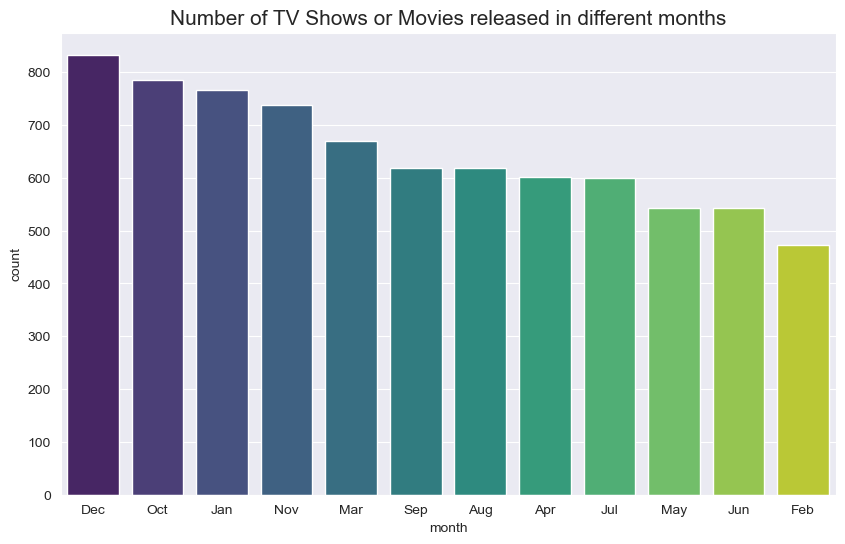

In [41]:
import calendar
netflix["month"] = netflix["month"].apply(lambda x: calendar.month_abbr[x])
sns.countplot(data = netflix, x = "month", order= netflix["month"].value_counts().index, palette = "viridis")
plt.title("Number of TV Shows or Movies released in different months", fontsize = 15)

December had the highest streaming.

#### Task 4.15
Is there difference between the number of movies and tv shows released in each month?

Text(0.5, 1.0, 'Number of TV Shows & Movies released in different months')

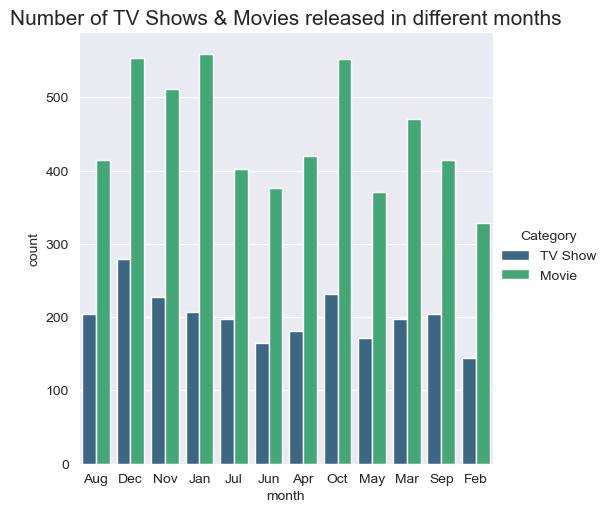

In [42]:
sns.catplot(data = netflix, x = "month", hue = "Category", kind = "count", palette = "viridis")
plt.title("Number of TV Shows & Movies released in different months", fontsize = 15)

December marked the peak of streaming activity for TV shows, whereas January claimed the highest viewership for movies. Additionally, across all months, movies consistently garnered notably higher streaming numbers compared to TV shows.